# Zadanie 1
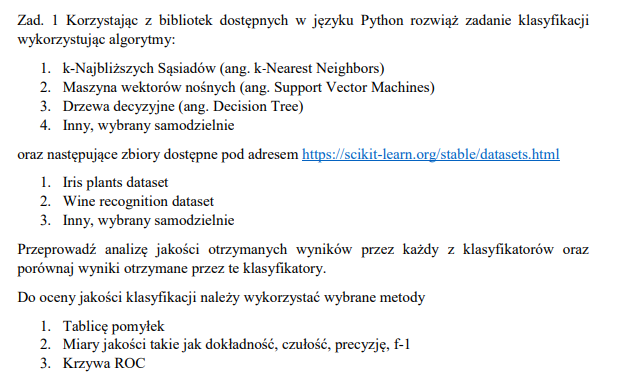

Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.86      1.00      0.92         6
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.95      0.93      0.94        15
weighted avg       0.94      0.93      0.93        15



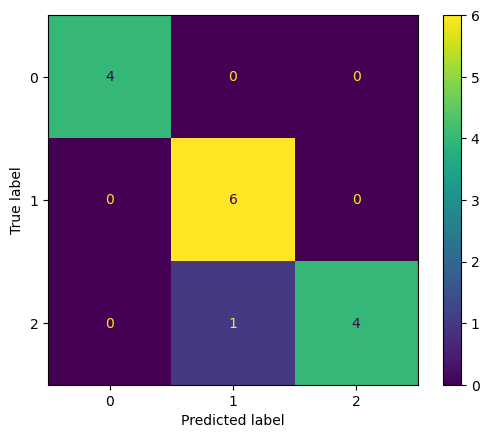

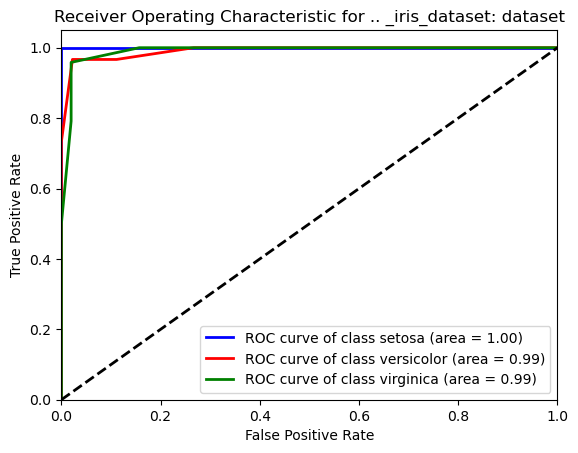

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         7

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



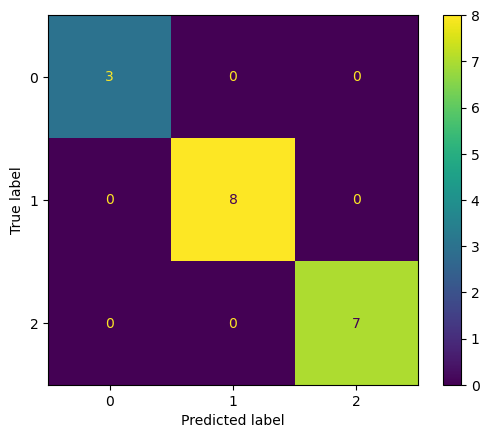

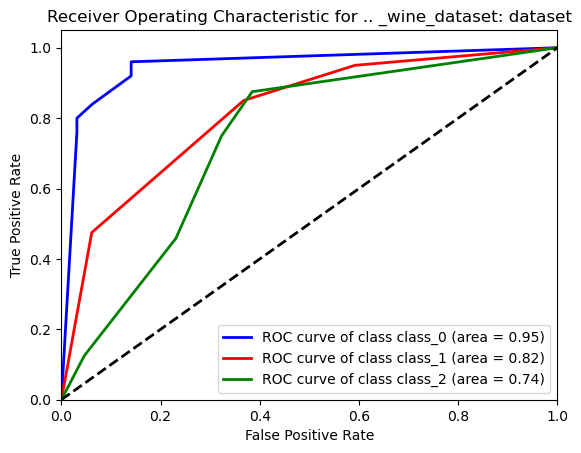

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.95      0.95      0.95        39

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



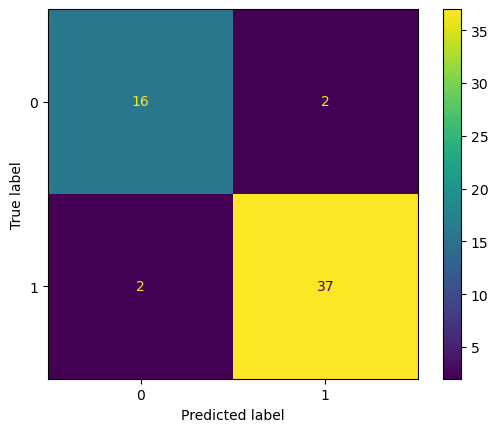

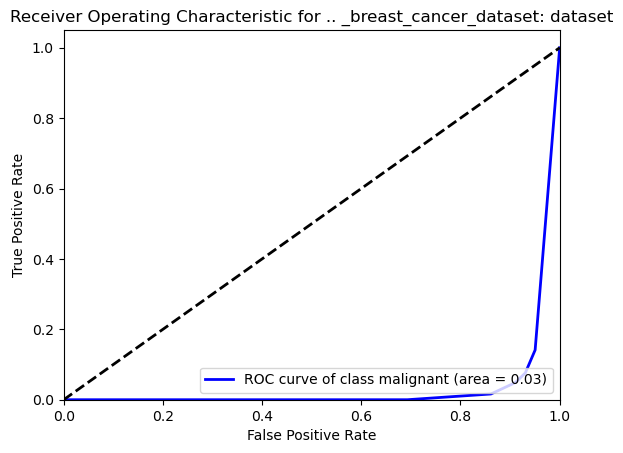

In [56]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

def show_confusion_matrix(Y_test, Y_pred, labels):
    cm = confusion_matrix(Y_test, Y_pred, labels=labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
    disp.plot()

def show_roc(dataset):
    X = dataset.data
    y = dataset.target
    target_names = dataset.target_names

    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

    # Binarize the target classes
    Y_test = label_binarize(y_test, classes=np.unique(y))
    n_classes = Y_test.shape[1]

    # Fit the k-nearest neighbors model
    clf = KNeighborsClassifier(n_neighbors=5)
    clf.fit(X_train, y_train)

    # Predict the test set probabilities
    y_score = clf.predict_proba(X_test)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curve for each class
    plt.figure()
    lw = 2
    colors = ['blue', 'red', 'green']
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(target_names[i], roc_auc[i]))

    # Plot chance line
    plt.plot([0, 1], [0, 1], 'k--', lw=lw)

    # Set plot parameters
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic for {0} dataset'.format(dataset['DESCR'].split('\n')[0]))
    plt.legend(loc="lower right")
    plt.show()



def apply_knearest_neighbours_to_dataset(dataset):
    X = dataset.data[:, :2]
    Y = dataset.target

    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

    knn = KNeighborsClassifier()
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)

    # confusion matrix
    show_confusion_matrix(Y_test, Y_pred, labels=knn.classes_)

    # precission - precyzja
    # recall - czułość
    # accuracy - dokładność
    # f1 - kombinacja precyzji i czułości
    target_names = [str(x) for x in knn.classes_]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    # ROC curve
    show_roc(dataset)

def apply_svm_to_dataset(dataset):
    X = dataset.data
    y = dataset.target
    classes=np.unique(y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

    clf = svm.SVC(kernel='linear', C=1.0, random_state=0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    # confusion matrix
    show_confusion_matrix(Y_test, Y_pred, classes)

    # Calculated stats
    target_names = [str(x) for x in classes]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    # roc
    show_roc(dataset)

def apply_decision_tree_to_dataset(dataset):
    X = dataset.data
    y = dataset.target
    classes=np.unique(y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)

    # confusion matrix
    show_confusion_matrix(Y_test, Y_pred, classes)

    # Calculated stats
    target_names = [str(x) for x in classes]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    # roc
    show_roc(dataset)

def apply_naive_bayes_to_dataset(dataset):
    X = dataset.data
    y = dataset.target
    classes=np.unique(y)

    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1)

    gnb = GaussianNB()
    gnb.fit(X_train, Y_train)
    Y_pred = gnb.predict(X_test)

    # confusion matrix
    show_confusion_matrix(Y_test, Y_pred, classes)

    # Calculated stats
    target_names = [str(x) for x in classes]
    print(classification_report(Y_test, Y_pred, target_names=target_names))

    # roc
    show_roc(dataset)


iris = datasets.load_iris()
wine = datasets.load_wine()
breast_cancer = datasets.load_breast_cancer()

# print("K-Nearest neighbours")
# apply_knearest_neighbours_to_dataset(iris)
# apply_knearest_neighbours_to_dataset(wine)
# apply_knearest_neighbours_to_dataset(breast_cancer)

# print("SVM")
# apply_svm_to_dataset(iris)
# apply_svm_to_dataset(wine)
# apply_svm_to_dataset(breast_cancer)

# print("Decision Trees")
# apply_decision_tree_to_dataset(iris)
# apply_decision_tree_to_dataset(wine)
# apply_decision_tree_to_dataset(breast_cancer)

print("Gaussian Naive Bayes")
apply_naive_bayes_to_dataset(iris)
apply_naive_bayes_to_dataset(wine)
apply_naive_bayes_to_dataset(breast_cancer)

